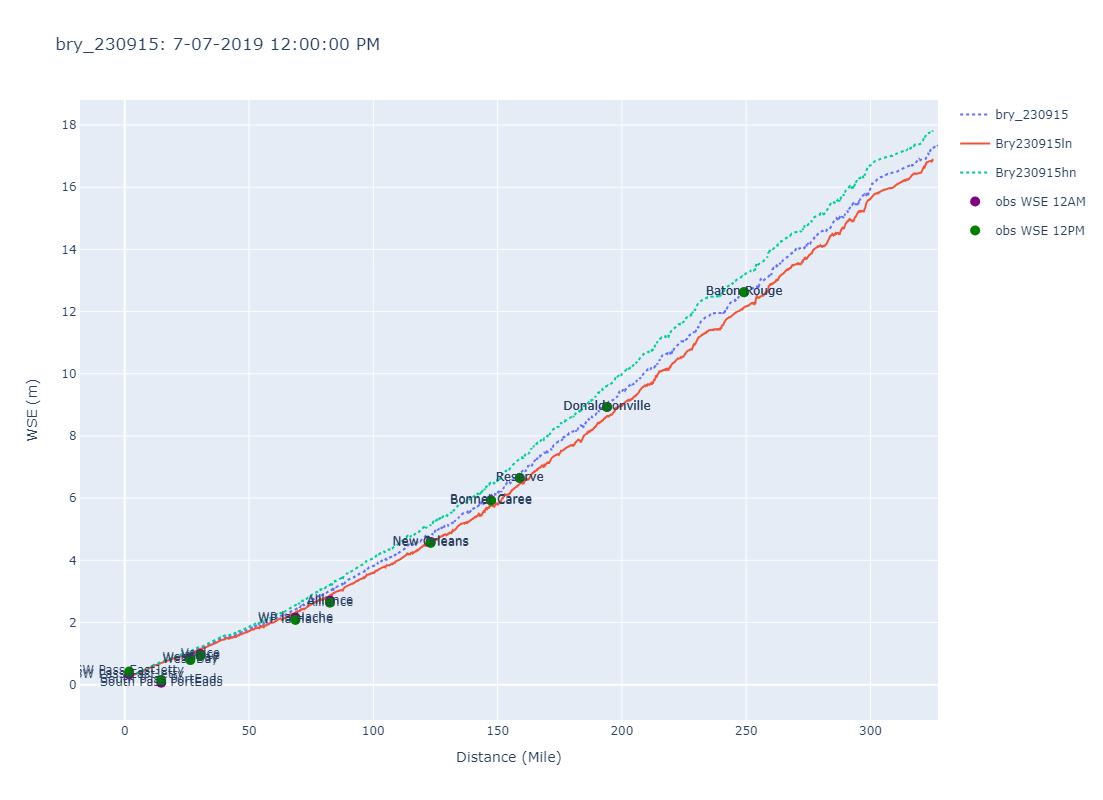

In [11]:
import pandas as pd
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio

py.init_notebook_mode(connected=True)

run = 'bry_230915'

# Load the Obs Excel file into a DataFrame
df = pd.read_excel(r'T:/Active Projects/US Army Corps of Engineers/ERDC CHL/ADH Barry/Working Data/Water_level_validation/Longitudinal Profile/profile simulated.xlsx', sheet_name='station_observed')

# Load the Excel file for the distance vs. WSE data
df_distance = pd.read_excel(r'T:/Active Projects/US Army Corps of Engineers/ERDC CHL/ADH Barry/Working Data/Water_level_validation/Longitudinal Profile/profile simulated.xlsx', sheet_name=run)
distance = df_distance.iloc[1:, [0, 2,9,11]]
wse = df_distance.iloc[1:, [1, 3,10,12]]

# Create an interactive line plot for Distance vs. WSE
line_fig = go.Figure()

# Add scatter traces to the line plot
#line_fig.add_trace(go.Scatter(x=distance.iloc[:, 0]/1600, y=wse.iloc[:, 0], mode='lines', name='7-07-2019 12:00:00 AM'))
line_fig.add_trace(go.Scatter(x=distance.iloc[:, 1]/1600, y=wse.iloc[:, 1], mode='lines',line=dict(dash='dot'), name='bry_230915 7-07-2019 12:00:00 PM'))
line_fig.add_trace(go.Scatter(x=distance.iloc[:, 2], y=wse.iloc[:, 2], mode='lines', name='Bry230915ln')) # already in mile
line_fig.add_trace(go.Scatter(x=distance.iloc[:, 3], y=wse.iloc[:, 3], mode='lines',line=dict(dash='dot'), name='Bry230915hn')) ## already in mile

# Update trace and layout properties for the line plot
line_fig.update_xaxes(title_text='Distance', showline=True, showgrid=True)
line_fig.update_yaxes(title_text='WSE', showline=True, showgrid=True)
line_fig.update_layout(
    width=1000,  # Set the width (in pixels)
    height=800,  # Set the height (in pixels)
    xaxis_title='Distance',
    yaxis_title='WSE',
    title='Distance vs. WSE',
    showlegend=True,
    hovermode='closest'
)

# Create an interactive scatter plot using Plotly Express
scatter_fig = px.scatter(df, x=df['Partial_Length'] / 1600, y=['obs WSE 12AM', 'obs WSE 12PM'], text='Name',color_discrete_map={'obs WSE 12AM': 'purple', 'obs WSE 12PM': 'green'})

# Update marker size for scatter traces in scatter_fig
scatter_fig.update_traces(marker=dict(size=10))

# Combine the plots with scatter_fig on top of line_fig
combined_fig = line_fig.add_traces(scatter_fig.data)

# Update axis titles for the scatter plot
combined_fig.update_xaxes(title_text=r'Distance (Mile)')
combined_fig.update_yaxes(title_text=r'WSE (m)')

# Update layout properties for the combined figure
combined_fig.update_layout(width=1000, height=800, title=run+': 7-07-2019 12:00:00 PM', showlegend=True)

# Show the interactive combined plot in Jupyter Notebook
combined_fig.show()

pio.write_html(combined_fig, 'plotly_plot.html')